<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [4]:
# Check for GPU
!nvidia-smi

Mon Mar 13 07:59:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.100      Driver Version: 440.100      CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:19:00.0 Off |                  N/A |
|  0%   36C    P0    52W / 300W |      0MiB / 11019MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:67:00.0 Off |                  N/A |
| 23%   43C    P0    64W / 300W |      0MiB / 11019MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [5]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


1.12.1


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Autonomous driving
2. Factory anomaly detection
3. China CCTV surveilance

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting means the model is trained on training set `too` well ,but the performance on the test set and generalization power are relatively poor.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Regularization
2. Cross validation
3. Early stopping

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

train_data = datasets.MNIST(train=True, transform=ToTensor(), target_transform=None,  download=True, root = './data/')
test_data = datasets.MNIST(train=False, transform=ToTensor(), target_transform=None,  download=True, root='./data/')

## 6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28])


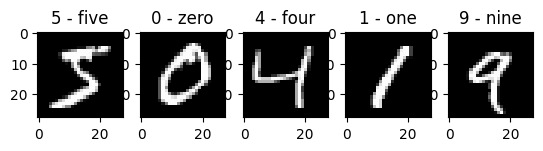

In [7]:
for i in range(5):
  plt.subplot(1,5,i+1)
  img, label = train_data[i]
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(train_data.classes[label])
print(img.shape)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [37]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data, batch_size = 32)
test_dataloader = DataLoader(dataset=test_data, batch_size=32)
train_classes = train_data.classes
test_classes = test_data.classes

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [38]:
from torch import nn
class TinyVGG(nn.Module):
  def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_layer1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_layer2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3,3), stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=49*hidden_units, out_features=output_shape)
    )
  def forward(self, x:torch.Tensor):
    #print(x.shape)
    x = self.conv_layer1(x)
    #print(x.shape)
    x = self.conv_layer2(x)
    #print(x.shape)
    #print(x.flatten().shape)
    x = self.classifier(x)
    #print(x.shape)
    return x

In [39]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

model_2 = TinyVGG(input_shape=1, hidden_units=10, output_shape=len(train_classes))
img,label = train_data[0]
img.unsqueeze(dim=0).shape
model_2(img.unsqueeze(dim=0))


tensor([[ 0.0115,  0.0391, -0.0138, -0.0167, -0.0226, -0.0131,  0.0608,  0.0578,
          0.0313,  0.0999]], grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [40]:
# setup essential functions and metrics
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_2.parameters(), lr = 0.1)
accuracy_fn = accuracy_fn

In [50]:
%%time
from timeit import Timer as timer
from tqdm import tqdm
train_start_cpu = timer()

epochs = 5
device = 'cpu'
model_2.to(device)
for epoch in tqdm(range(epochs)):
    train_acc, train_loss = 0,0
    model_2.train()
    for batch,(X,y) in enumerate(train_dataloader):
        train_logit = model_2(X)
        train_pred = train_logit.softmax(dim=0).argmax(dim=1)
        train_acc +=accuracy_fn(y_true=y, y_pred = train_pred)
        loss = loss_fn(train_logit, y)
        
        
        
        
        
        train_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    
    
    
    model_2.eval()
    test_acc, test_loss = 0,0
    with torch.inference_mode():
        for batch,(X_test,y_test) in enumerate(test_dataloader):
            test_logit = model_2(X_test)
            test_pred = test_logit.softmax(dim=0).argmax(dim=1)
            test_acc += accuracy_fn(y_true=y_test, y_pred = test_pred)
            loss = loss_fn(test_logit, y_test)
            test_loss +=loss
        test_loss /= len(test_dataloader)
        
    print(f"train_loss : {train_loss:.5f} | test_loss ; {test_loss:.5f}")
    

 20%|██        | 1/5 [00:10<00:40, 10.17s/it]

train_loss : 0.27356 | test_loss ; 0.09606


 40%|████      | 2/5 [00:20<00:30, 10.28s/it]

train_loss : 0.07111 | test_loss ; 0.07193


 60%|██████    | 3/5 [00:30<00:20, 10.21s/it]

train_loss : 0.05566 | test_loss ; 0.05629


 80%|████████  | 4/5 [00:40<00:10, 10.17s/it]

train_loss : 0.04730 | test_loss ; 0.04589


100%|██████████| 5/5 [00:50<00:00, 10.19s/it]

train_loss : 0.04158 | test_loss ; 0.04574
CPU times: user 10min 10s, sys: 331 ms, total: 10min 10s
Wall time: 51 s


In [49]:
%%time
from timeit import Timer as timer
from tqdm import tqdm

epochs = 5
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_gpu = TinyVGG(input_shape =1, hidden_units = 10, output_shape =len(train_classes)).to(device)
for epoch in tqdm(range(epochs)):
    train_loss = 0
    model_gpu.train()
    for batch,(X,y) in enumerate(train_dataloader):
        X = X.to(device)
        y = y.to(device)
        train_logit = model_gpu(X)
        train_pred = train_logit.softmax(dim=0).argmax(dim=1)
        train_acc +=accuracy_fn(y_true=y, y_pred = train_pred)
        loss = loss_fn(train_logit, y)
        train_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_dataloader)
    
    
    model_gpu.eval()
    test_acc, test_loss = 0,0
    with torch.inference_mode():
        for batch,(X_test,y_test) in enumerate(test_dataloader):
            X_test = X_test.to(device)
            y_test = y_test.to(device)
            test_logit = model_gpu(X_test)
            test_pred = test_logit.softmax(dim=0).argmax(dim=1)
            test_acc += accuracy_fn(y_true=y_test, y_pred = test_pred)
            loss = loss_fn(test_logit, y_test)
            test_loss +=loss
        test_loss /= len(test_dataloader)
        
    print(f"train_loss : {train_loss:.5f} | test_loss : {test_loss:.5f}")
    

cuda:0


 20%|██        | 1/5 [00:09<00:37,  9.34s/it]

train_loss : 2.30402 | test_loss : 2.30433


 40%|████      | 2/5 [00:18<00:27,  9.32s/it]

train_loss : 2.30402 | test_loss : 2.30433


 60%|██████    | 3/5 [00:27<00:18,  9.33s/it]

train_loss : 2.30402 | test_loss : 2.30433


 80%|████████  | 4/5 [00:37<00:09,  9.34s/it]

train_loss : 2.30402 | test_loss : 2.30433


100%|██████████| 5/5 [00:46<00:00,  9.32s/it]

train_loss : 2.30402 | test_loss : 2.30433
CPU times: user 46 s, sys: 434 ms, total: 46.4 s
Wall time: 46.8 s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [36]:
print(torch.cuda.is_available())

True


In [89]:
model_2.to(device)
model_2.eval()
y_preds=[]
with torch.inference_mode():
    for batch, (X,y) in enumerate(test_dataloader):
        pred_logit = model_2(X)
        pred_label = pred_logit.softmax(dim=1).argmax(dim=1)
        y_preds.append(pred_label)
y_preds = torch.cat(y_preds).cpu()
print(y_preds[:10],test_data.targets[:10])
        

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

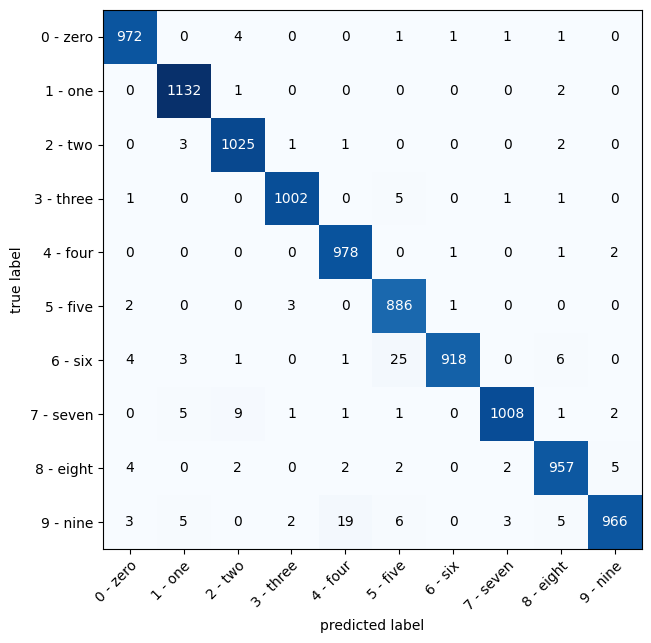

In [94]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmatrix = ConfusionMatrix(task= 'multiclass',num_classes = 10)
confmat_tensor = confmatrix(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=test_classes,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [102]:
rand_tensor = torch.randn(size = (1,3,64,64))
conv = nn.Conv2d(kernel_size =9, padding = 1, stride = 3, in_channels = 3, out_channels = 10)
print(conv(rand_tensor).shape)

torch.Size([1, 10, 20, 20])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [217]:
import torch, torchvision
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch import nn

train_data = torchvision.datasets.FashionMNIST(root = './data', train=True, transform = ToTensor(), download=False)
test_data = torchvision.datasets.FashionMNIST(root = './data',train =False, transform = ToTensor(), download=False)
train_dataloader = torch.utils.data.DataLoader(dataset = train_data, batch_size = 512, shuffle = True)
test_dataloader = torch.utils.data.DataLoader(dataset = test_data, batch_size = 512, shuffle = False)
class_names = train_data.classes

torch.Size([1, 28, 28])


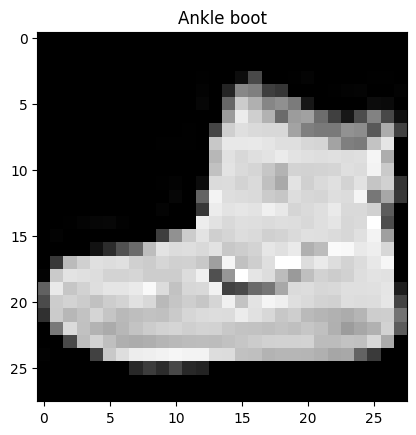

In [218]:
img, label = train_data[0]
plt.imshow(img.squeeze(),cmap = 'gray')
plt.title(class_names[label])
print(img.shape)

In [219]:
len(train_dataloader)

118

In [220]:
class FashionMnistModel(nn.Module):
    def __init__(self, input_shape: int, hidden_shape : int, output_shape: int):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=hidden_shape, stride=1,padding=1, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_shape, out_channels = hidden_shape, stride=1, padding=1, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_shape, out_channels=hidden_shape, stride=1,padding=1, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_shape, out_channels = hidden_shape, stride=1, padding=1, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= 49*hidden_shape, out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.classifier(x)
        return x
    
model = FashionMnistModel(input_shape =1, hidden_shape = 10, output_shape=len(class_names))
model

FashionMnistModel(
  (conv1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [226]:
# Setup device agnostic code and metrics
from helper_functions import accuracy_fn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.2)

In [230]:
from tqdm import tqdm

epochs = 10

model = model.to(device)
for epoch in tqdm(range(epochs)):
    model.train()
    train_loss, train_acc = 0,0
    for batch, (X,y) in enumerate(train_dataloader):
        X = X.to(device)
        y = y.to(device)
        
        logit = model(X)
        pred = logit.softmax(dim=1).argmax(dim=1)
        #print(f"pred.shape:{pred.shape}")
        #print(f"y.shape:{y.shape}")
        loss = loss_fn(logit, y)
        train_loss += loss 
        train_acc += accuracy_fn(y_true = y, y_pred = pred)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    
    
    
    test_loss,test_acc = 0,0
    model.eval()
    with torch.inference_mode():
        for batch, (X,y) in enumerate(test_dataloader):
           # print(f"test X shape: {X.shape}")
            #print(f"test y.shape : {y.shape}")
            X ,y = X.to(device), y.to(device)
            test_logit = model(X)
            #print(f"test logit shape : {test_logit.shape}")
            test_pred = test_logit.softmax(dim=1).argmax(dim=1)
            #print(f"test pred.shape : {test_pred.shape}")
            loss = loss_fn(test_logit, y)
            test_loss += loss
            test_acc += accuracy_fn(y_true = y, y_pred = test_pred)
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"train loss : {train_loss:.5f} | train acc : {train_acc:.2f} | test loss : {test_loss:.5f} | test acc : {test_acc:.2f}")

 10%|█         | 1/10 [00:04<00:36,  4.04s/it]

train loss : 0.36871 | train acc : 86.60 | test loss : 0.42435 | test acc : 84.18


 20%|██        | 2/10 [00:08<00:32,  4.01s/it]

train loss : 0.36573 | train acc : 86.65 | test loss : 0.47038 | test acc : 81.73


 30%|███       | 3/10 [00:12<00:27,  4.00s/it]

train loss : 0.36173 | train acc : 86.72 | test loss : 0.49029 | test acc : 81.44


 40%|████      | 4/10 [00:16<00:24,  4.02s/it]

train loss : 0.36526 | train acc : 86.65 | test loss : 0.40716 | test acc : 85.16


 50%|█████     | 5/10 [00:20<00:20,  4.02s/it]

train loss : 0.35431 | train acc : 87.11 | test loss : 0.50909 | test acc : 83.43


 60%|██████    | 6/10 [00:24<00:16,  4.01s/it]

train loss : 0.35999 | train acc : 86.87 | test loss : 0.42127 | test acc : 84.58


 70%|███████   | 7/10 [00:28<00:12,  4.00s/it]

train loss : 0.35163 | train acc : 87.20 | test loss : 0.41043 | test acc : 85.02


 80%|████████  | 8/10 [00:32<00:07,  4.00s/it]

train loss : 0.35041 | train acc : 87.21 | test loss : 0.48182 | test acc : 82.56


 90%|█████████ | 9/10 [00:36<00:03,  4.00s/it]

train loss : 0.35380 | train acc : 87.11 | test loss : 0.41441 | test acc : 83.85


100%|██████████| 10/10 [00:40<00:00,  4.00s/it]

train loss : 0.35039 | train acc : 87.20 | test loss : 0.37867 | test acc : 85.74


In [231]:
model.eval()
y_preds=[]
with torch.inference_mode():
    for batch, (X,y) in enumerate(test_dataloader):
       # print(f"test X shape: {X.shape}")
        #print(f"test y.shape : {y.shape}")
        X ,y = X.to(device), y.to(device)
        test_logit = model(X)
        #print(f"test logit shape : {test_logit.shape}")
        test_pred = test_logit.softmax(dim=1).argmax(dim=1)
        y_preds.append(test_pred)
y_preds = torch.cat(y_preds).cpu()


In [235]:
import random
rand_selection = random.sample(list(range(10000)), k=15)

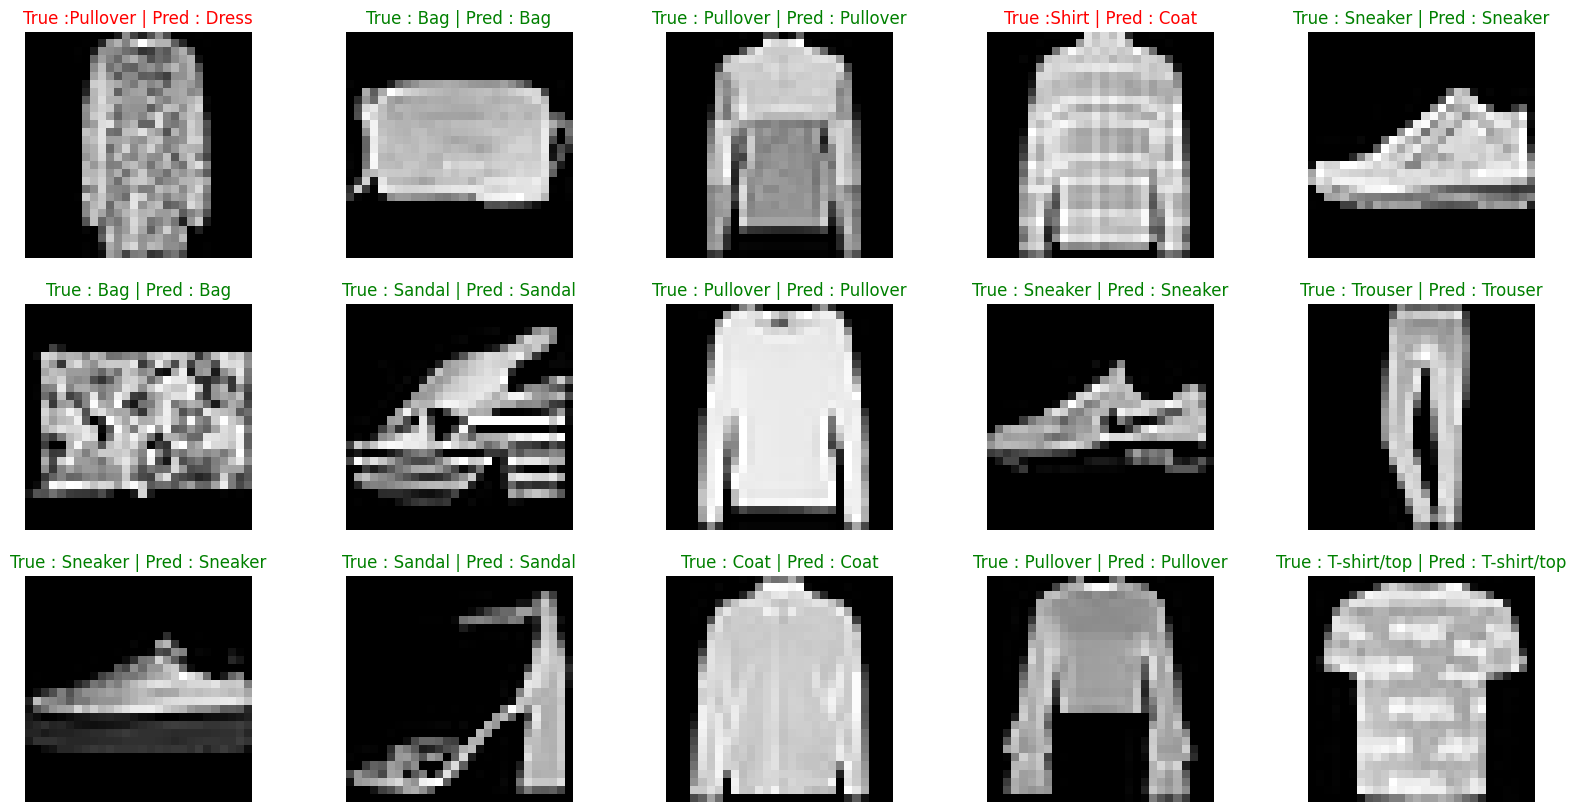

In [254]:
plt.figure(figsize = (20,10))
for i,idx in enumerate(rand_selection): 
    plt.subplot(3,5,i+1)
    plt.axis(False)
    plt.imshow(test_data[idx][0].squeeze(),cmap="gray")
    if test_data.targets[idx]==y_preds[idx]:
        plt.title(f"True : {class_names[test_data.targets[idx]]} | Pred : {class_names[y_preds[idx]]}",c="g")
    else:
        plt.title(f"True :{class_names[test_data.targets[idx]]} | Pred : {class_names[y_preds[idx]]}",c="r")